## Introduction to Density Matrix 

#### Muhammad Gaffar
-------------------

### Introduction

In quantum physics, the probability being at $x$ in energy level $n$ is 

$$
\rho_n(x) = \frac{1}{Z} \exp(-\beta E_n) \psi^*_n(x)\psi_n(x)
$$

in computation, $n$ usually unknown, thus quantity above is impractical. We define density matrix

$$
\rho(x,x') \equiv \sum_n \psi_n(x) \exp(-\beta E_n)\psi_n^*(x')
$$

This is will be the central object of statistical quantum physics. It is easily can be seen that 

$$
Z(\beta) = \int dx \rho(x,x,\beta) = \text{tr} \; \mathbf{\rho}
$$

where $\mathbf{\rho}$ is matrix.

### Perturbation Theory

For perutabation theory, we need to realize that density matrix is operator, where it is given by

$$
\hat{\rho} = \exp(-\beta\hat{H})
$$

for pertubation consideration

$$
\hat{\rho} = 1 - \beta\hat{H} + \frac{1}{2}\beta^2\hat{H}^2 - \mathcal{O}(\hat{H}^3) + ...
$$

in bracket notation (this notation is useful for computational literate) the density matrix elemts can be computed as follow

$$
\rho_{kl} = \langle k | \hat{\rho} | l \rangle = \delta_{kl} - \beta H_{kl} + \frac{1}{2} \beta^2 \sum_n H_{kn}H_{nl}
$$

where $H_{ij}$ is element of row $i$ and column $j$ of Hamiltonian matrix.

in $x$-coordinate

$$
\rho(x,x',\beta) = \sum_{kl} \langle x | k \rangle \langle k | \hat{\rho} | l \rangle \langle l | x' \rangle
$$

Before we are using numerical technique to compute density matrix, first of all we need to explore all possible of analytic solution of density matrix.

### Density Matrix of Free Particle

Schrodinger equation of free particle is

$$
H_0 \psi = -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}\psi = E\psi
$$

in undergraduate quantum mechanics, the solution of wave function for free particle confined in the periodic boundary box with length $L$ is

$$
\psi(x) = \sqrt{\frac{1}{L}}\exp\left[i\left(2n\pi\frac{x}{L}\right)\right]; \quad E_n = \frac{2n^2\hbar^2\pi^2}{mL^2}
$$

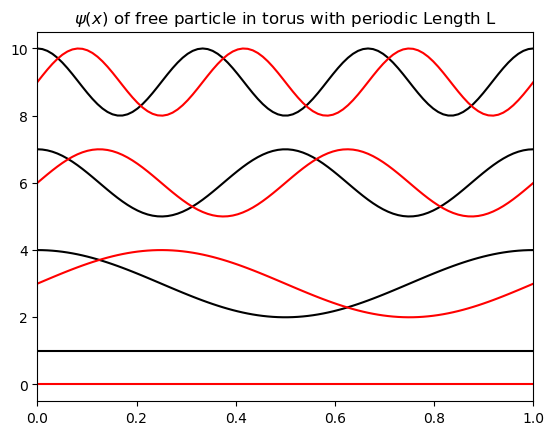

In [1]:
"""
Wave function of free particle in torus
"""
function ψtorus(n,L)
    x = LinRange(0,L,100)
    A = sqrt(1/L)
    psi = exp.(1im .* (2π*n .* x ./ L))
    return x,A.*psi
end

L = 1
x,psi = ψtorus(1,L)

using PyPlot

for n in [0,1,2,3]
    x,psi = ψtorus(n,L)
    plot(x,real.(psi) .+ n*3,"k-")
    plot(x,imag.(psi) .+ n*3,"r")
end
title(L"$\psi(x)$" * " of free particle in torus with periodic Length L")
xlim(0,L);

The density matrix of this wavefunction

$$
\rho(x,x',\beta) = \sum_n \psi_n(x) \exp(-\beta E_n) \psi_n^*(x)
= \sum_n\frac{1}{L}\exp\left[i\left(2n\pi\frac{x-x'}{L}\right)\right]\exp\left(-\beta\frac{2n^2\hbar^2\pi^2}{mL^2}\right)
$$

Before working for finite $L$, we set limit $L \rightarrow \infty$. In this limit, we can see particle in free space. Thus we can construct summation above as integral. Because $\Delta_n = 1$, we can write

$$
\rho_0(x,x',\beta) = \frac{1}{L} \sum_n \Delta_n \exp\left[i\left(2n\pi\frac{x-x'}{L}\right)\right]\exp\left(-\beta\frac{2n^2\hbar^2\pi^2}{mL^2}\right)
$$

by change variable, $\lambda = \frac{2n\pi}{L}$, thus

$$
\rho_0(x,x',\beta) = \frac{1}{2\pi} \sum_\lambda \Delta_\lambda \exp\left[i\lambda(x-x')\right]\exp\left(-\frac{\beta\hbar^2}{2m}\lambda^2\right)
$$

this equivalent as

$$
\rho_0(x,x',\beta) = \lim_{L\rightarrow \infty }\frac{1}{2\pi} \int_{-\infty}^{\infty} d\lambda \exp\left[i\lambda(x-x')\right]\exp\left(-\frac{\beta\hbar^2}{2m}\lambda^2\right)
$$

equation above can be solve by gaussian integral.

----------------------------

**Gaussian Integral**

The integral of gaussian function is normalized

$$
\int_{-\infty}^{\infty} \frac{d\lambda}{\sqrt{2\pi\sigma^2}} \exp\left[-\frac{1}{2}\frac{(\lambda \pm c)^2}{\sigma^2}\right] = 1
$$

where $c \in \mathbb{C}$. If we re-write equation above

$$
\int_{-\infty}^{\infty}\exp\left[-\frac{1}{2}\frac{\lambda^2}{\sigma^2} \mp \lambda \frac{c}{\sigma^2} \right] = \sqrt{2\pi\sigma^2}\exp\left(\frac{c^2}{2\sigma^2}\right)
$$
----------------------------

if we write density matrix integral like integral above, hence we get the final result

$$
\rho_0(x,x',\beta) = \frac{1}{2\pi} \int_{-\infty}^{\infty} d\lambda \exp\left(-\frac{\beta\hbar^2}{2m}\lambda^2 + \lambda i(x-x')\right) = \sqrt{\frac{m}{2\pi\hbar^2\beta}}\exp\left[\frac{m(x-x')^2}{2\hbar^2\beta}\right]
$$

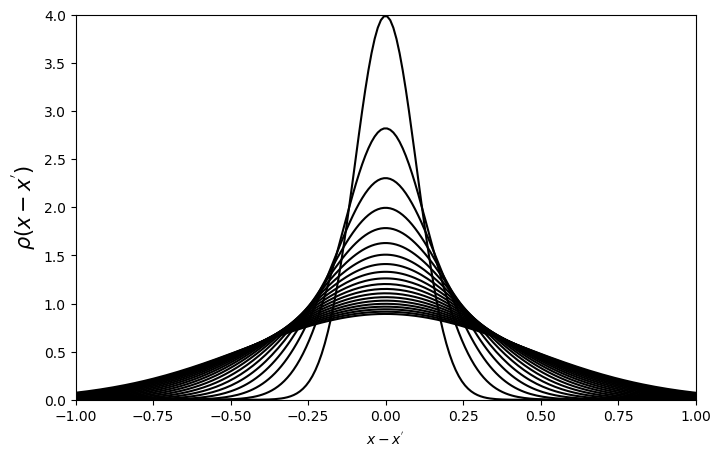

In [2]:
using LinearAlgebra

"""
Density matrix of free particle in Torus
"""
function ρ(Δx,β)
    m = 1
    h = 1
    
    a = sqrt(m/(2π*h^2*β))
    rho = exp(-m*Δx^2/(2*h^2*β))
    return a*rho
end

n = 200
L = 1
Δx = LinRange(-L,L,n)

rho = zeros(Float64,n)
plt.figure(figsize=(8,5))
for β in 0.01:0.01:0.2
    plot(Δx,ρ.(Δx,β),label="β = $β","k-")
end
xlabel(L"x-x^{'}")
ylabel(L"ρ(x-x^{'})",fontsize=15)
xlim(-L,L)
ylim(0,4);

We can see at limit high temperature,

$$
\lim_{\beta \rightarrow 0} \rho(x,x',\beta) \rightarrow \delta(x-x')
$$

### Particle in the Finite Box (with and without periodic boundary)

#### A. With periodic boundary

For finite $L$, the density matrix is in the form of summation as we derive before. Now, we consider for periodic boundary

$$
\rho(x,x',L) = \frac{1}{L}\sum_{n=-\infty}^{\infty}\exp\left[i\left(2n\pi\frac{x-x'}{L}\right)\right]\exp\left(-\beta\frac{2n^2\hbar^2\pi^2}{mL^2}\right)
$$

we can simplifying this form by transform it using poisson sum formula.

--------------

**Poisson Sum Formula**

For function $g(n)$ that have periodicity and $g_f(\omega)$ is its fourier transformation, and $g(n)$ is decaying as $n$ becomes large, sum over $n$ of $g(n)$ can be derived as follow (see [wikipedia](https://en.wikipedia.org/wiki/Poisson_summation_formula#Distributional_formulation))

$$
\sum_{n=-\infty}^{\infty} g(n) = \sum_{\omega=-\infty}^{\infty} g_f(\omega) = \sum_{\omega=-\infty}^{\infty} \int_{-\infty}^{\infty} d\phi \; g(\phi)e^{i(2\pi\omega\phi)}
$$

----------------------------

by taking the $g(n)$ as 

$$
g(n) = \exp\left[i\left(2n\pi\frac{x-x'}{L}\right)\right]\exp\left(-\beta\frac{2n^2\hbar^2\pi^2}{mL^2}\right)
$$

density matrix then

$$
\rho(x,x',L) = \frac{1}{L}\sum_{\omega=-\infty}^{\infty} \int_{\phi=-\infty}^{\infty} d\phi \; \exp\left( i2\pi\phi\frac{x-x'+L\omega}{L}\right) \exp\left(-\frac{\beta\hbar^2\pi^2}{mL^2}\phi^2 \right)
$$

again, this is simply a gaussian integral. The simplified density matrix is

$$
\rho(x,x',L) = \sqrt{\frac{m}{2\pi\beta\hbar^2}} \sum_{\omega=-\infty}^{\infty} \exp\left[-\frac{m(x-x'-\omega L)^2}{2\beta\hbar^2}\right] = \sum_{\omega=-\infty}^{\infty} \rho_0(x,x'+\omega L,\beta)
$$

the partition function $Z$ can be seen as sum of energy and sum of winding numbers (or frequency of fourier series), by taking both representative of diagonal element of density matrix $\rho(x,x,\beta)$

$$
\rho(x,x,\beta) = \frac{1}{L}\sum_n \exp\left(-\frac{\beta \hbar^2 n^2\pi^2}{mL^2}\right) = \sqrt{\frac{1}{2\pi\beta}} \sum_\omega \exp\left[-\frac{m(\omega L)^2}{2\beta\hbar^2}\right]
$$

thus

$$
Z = \text{tr} \; \rho = \int dx \; \rho(x,x,\beta) = \sum_n \exp\left(-\frac{\beta \hbar^2 n^2\pi^2}{mL^2}\right) = \sqrt{\frac{L^2}{2\pi\beta}} \sum_\omega \exp\left[-\frac{m(\omega L)^2}{2\beta\hbar^2}\right]
$$


#### B. Without Periodic boundary

For finite non-periodic box, the wavefunction must vanish at the edge of the wall, $\psi(x = 0) = 0$ and $\psi(x = L) = 0$, for free hamiltonian, the solution is simply sinusoidal wave function

$$
\psi_n(x) = \sqrt{\frac{2}{L}}\sin\left(n\pi\frac{x}{L}\right); \quad n = 1,2,...,\infty
$$

the energies of this wave function is

$$
E_n = \frac{\hbar^2}{2m}(\frac{n\pi}{L})^2
$$

So given those quantity, we construct density matrix

$$
\rho(x,x',\beta) = \sum_{n=1}^{\infty} \psi_n(x)\exp(-\beta E_n)\psi^*_n(x) = \frac{1}{L}\sum_{n=-\infty}^{\infty} \sin\left(n\pi\frac{x}{L}\right)\exp\left(-\beta^2\frac{\hbar^2\pi^2 n^2}{2mL^2}\right)\sin\left(n\pi\frac{x'}{L}\right)
$$

*exercise : show that density matrix above can be write as term of periodic boundary density matrix*

$$
\rho_{\text{box}}(x,x',\beta) = \rho_{\text{per},2L}(x,x',\beta) - \rho_{\text{per},2L}(x,-x',\beta)
$$

or

$$
\rho_{\text{box}}(x,x',\beta) = \sum_{\omega=-\infty}^{\infty}[\rho_0(x,x+2\omega L,\beta) - \rho_0(x,-x'+2\omega L,\beta)]
$$

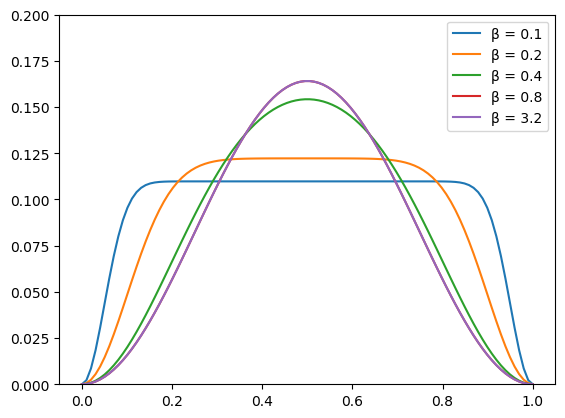

In [51]:
"""
probability that particle in the box in the position of x
"""
function π_box(x,β)
    L = 1
    h = 1
    m = 1
    
    ns = collect(-50:50)
    
    result = 0
    for n in ns
        A = n*π*x/L
        B = (β*h*π*n)^2 / (2*m*L^2)
        result += (sin(A))^2*exp(-B)
    end
    
    return result / L
end;

x = LinRange(0,1,100)

for β in [0.1,0.2,0.4,0.8,3.2]
    prob = normalize(π_box.(x,β))
    plot(x,prob,label="β = $β")
end
ylim(0,0.2)
legend();